In [128]:
import sklearn.datasets
import tqdm
from matplotlib import pyplot as plt
import numpy as np
from sklearn import tree, ensemble, metrics

In [48]:
list(enumerate(['mamad', 'asghar', 'akbar']))

[(0, 'mamad'), (1, 'asghar'), (2, 'akbar')]

### Image Data

In [3]:
digits = sklearn.datasets.load_digits()

In [6]:
digits.images.shape

(1797, 8, 8)

In [8]:
digits.target.shape

(1797,)

In [ ]:
[N, m]

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Text Data

In [33]:
! head /home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_train.json | jq

{
  "title": "... شورانگيز و غمگنانه",
  "text": "به مناسبت يكصدوسي امين سالروز درگذشت روسيني \nيك صدو سي امين سالمرگ جياچينوروسيني در حالي از راه \nمي رسد كه اپراهاي \"سلماني شهر سويل \"و حماسه \"ويليام \nتل\" همچنان مشتاقان و شيفتگان موسيقي را به تالارهاي \nاپرا مي كشاند. \nروسيني را مي توان از مردان شگفتي ساز موسيقي دانست. در\n1829(37 سالگي)در اوج شهرتش پس از موفقيت \"ويليام تل \"\nاز اپرا و تقريبا\" به طور كامل از موسيقي كناره گيري كرد. \nبه جز مجموعه قطعاتي براي پيانو و چندساز ديگرو تعدادي \nآثار مذهبي به جرات مي توان گفت كه در 39 سال پايان \nزندگي اش هيچ اثري خلق نكرد. \nگرچه حدس هاي بسياري زده مي شود ولي هيچكس به درستي \nنمي داند كه چرا يكي از بزرگترين مصنفين اپرا در اروپا\nاز تئاتر دوري جست. شايد تصنيف 38 اپرا طي 19 سال او را\nخسته كرده است. شايد آينده اپرا را مغاير با راه و روش \nخود يافت و شايد هم خواست از ثروت و شهرتي كه موسيقي \nنصيبش كرده بود باقي عمر را با خيالي راحت بگذراند. \nروسيني در 29 فوريه 1792 در شهر پيزارو ايتاليا ديده به \nجهان گشود. والدينش نوازندگاني دوره گرد 

In [35]:
! du -h /home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_*.json 

160M	/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_2006.json
34M	/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_test.json
1.3G	/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_train.json
25M	/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_valid.json


In [204]:
import random
import json
import hazm
from collections import Counter

In [37]:
sum(1 for line in open('/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_train.json'))

298699

In [205]:
path = '/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_train.json'
test_path = '/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_test.json'
valid_path = '/home/ahrzb/Desktop/Datasets/Hamshahri/hamshahri_valid.json'

indices = set(random.sample(range(298699), 10000))
docs = [
    json.loads(line) 
    for idx, line in tqdm.tqdm_notebook(enumerate(open(path)), total=298699) 
    if idx in indices
]

test_docs = [
    json.loads(line) 
    for line in tqdm.tqdm_notebook(open(test_path))
]
test_docs = [doc for doc in test_docs if isinstance(doc['text'], str)]

valid_docs = [
    json.loads(line) 
    for line in tqdm.tqdm_notebook(open(valid_path))
]
valid_docs = [doc for doc in valid_docs if isinstance(doc['text'], str)]

In [72]:
normalizer = hazm.Normalizer()

In [80]:
vocabulary = Counter(
    word
    for doc in tqdm.tqdm_notebook(docs)
    for word in hazm.word_tokenize(normalizer.normalize(doc['text']))
)

In [87]:
len(vocabulary)

107548

In [95]:
Counter(hazm.word_tokenize(normalizer.normalize(docs[0]['text']))).most_common()

[('،', 34),
 ('«', 29),
 ('»', 29),
 ('و', 8),
 ('در', 6),
 ('به', 4),
 ('.', 4),
 ('نمایشگاه', 3),
 ('استان', 3),
 ('تخصصی', 2),
 ('عکس', 2),
 ('مازندران', 2),
 ('اصفهان', 2),
 ('کرمان', 2),
 ('زنجان', 2),
 ('مرکزی', 2),
 ('همدان', 2),
 ('این', 2),
 ('که', 2),
 ('شش', 2),
 ('برپاست', 2),
 ('آذربایجان', 2),
 ('دراستانهای', 1),
 ('-', 1),
 ('طور', 1),
 ('همزمان', 1),
 ('افتتاح', 1),
 ('شد', 1),
 ('نمایشگاهها', 1),
 ('مدت', 1),
 ('روز', 1),
 ('آثاری', 1),
 ('از', 1),
 ('عکاسان', 1),
 ('شاخص', 1),
 ('جهانی', 1),
 ('مانند', 1),
 ('کارتیر', 1),
 ('برسون', 1),
 ('ماینور', 1),
 ('وایت', 1),
 ('الیوت', 1),
 ('پورتر', 1),
 ('ژوزف', 1),
 ('کودلکا', 1),
 ('روبرت', 1),
 ('هویزر', 1),
 ('معرض', 1),
 ('دید', 1),
 ('عموم', 1),
 ('قرار', 1),
 ('می\u200cگیرد', 1),
 ('همچنین', 1),
 ('بخشی', 1),
 ('تحت', 1),
 ('عنوان', 1),
 ('عکاسی', 1),
 ('فرم', 1),
 ('رنگ', 1),
 ('گزارش', 1),
 ('روابط', 1),
 ('عمومی', 1),
 ('انجمن', 1),
 ('سینمای', 1),
 ('جوانان', 1),
 ('ایران', 1),
 ('براساس', 1),
 ('برنامه', 1),
 ('ر

In [92]:
vocabulary.most_common()

[('و', 213663),
 ('در', 161013),
 ('.', 152427),
 ('به', 142784),
 ('،', 138986),
 ('از', 110408),
 ('که', 94569),
 ('این', 83538),
 ('را', 69841),
 ('با', 56454),
 ('است', 46662),
 (':', 35505),
 ('برای', 29411),
 ('آن', 25853),
 ('یک', 23003),
 ('خود', 19422),
 ('تا', 15562),
 ('بر', 15072),
 ('کرد', 14910),
 ('سال', 14788),
 ('ایران', 13925),
 ('«', 13889),
 ('هم', 13861),
 ('»', 13831),
 ('کشور', 13191),
 ('نیز', 13082),
 (')', 12828),
 ('(', 12510),
 ('گفت', 12333),
 ('می\u200cشود', 11072),
 ('شد', 10828),
 ('ما', 10740),
 ('دارد', 10629),
 ('وی', 10569),
 ('اما', 10208),
 ('یا', 10035),
 ('شده', 9743),
 ('هر', 9338),
 ('باید', 9196),
 ('قرار', 9184),
 ('بود', 9180),
 ('او', 9043),
 ('دیگر', 8966),
 ('آنها', 8872),
 ('تهران', 8700),
 ('دو', 8666),
 ('مورد', 8283),
 ('کار', 8267),
 ('-', 7730),
 ('شود', 7074),
 ('کند', 6934),
 ('می\u200cکند', 6930),
 ('عنوان', 6871),
 ('مردم', 6830),
 ('بین', 6698),
 ('اسلامی', 6619),
 ('روز', 6547),
 ('سازمان', 6547),
 ('وجود', 6498),
 ('پیش', 643

(array([499.,  87.,  29.,  12.,   8.,   5.,   8.,   0.,   1.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  1001.  ,   3127.62,   5254.24,   7380.86,   9507.48,  11634.1 ,
         13760.72,  15887.34,  18013.96,  20140.58,  22267.2 ,  24393.82,
         26520.44,  28647.06,  30773.68,  32900.3 ,  35026.92,  37153.54,
         39280.16,  41406.78,  43533.4 ,  45660.02,  47786.64,  49913.26,
         52039.88,  54

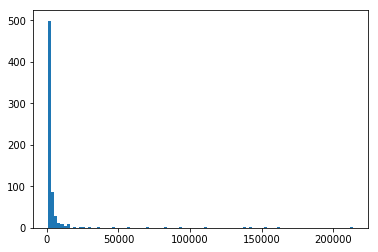

In [98]:
plt.hist([v for w, v in vocabulary.items() if v > 1000], bins=100)

* Vectorization
  * Count
  * Hashing Trick
* TF/IDF

In [261]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [295]:
normalizer = hazm.Normalizer()

In [231]:
vectorizer = TfidfVectorizer(
    tokenizer=hazm.word_tokenize,
    stop_words=hazm.stopwords_list(),
    preprocessor=normalizer.normalize,
    min_df=50
)

In [232]:
vectorizer.fit([doc['text'] for doc in docs if isinstance(doc['text'], str)])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=50,
        ngram_range=(1, 1), norm='l2',
        preprocessor=<bound method Normalizer.normalize of <hazm.Normalizer.Normalizer object at 0x7f427fcb7710>>,
        smooth_idf=True,
        stop_words=['و', 'در', 'به', 'از', 'که', 'این', 'را', 'با', 'است', 'برای', 'آن', 'یک', 'خود', 'تا', 'کرد', 'بر', 'هم', 'نیز', 'گفت', 'می\u200cشود', 'وی', 'شد', 'دارد', 'ما', 'اما', 'یا', 'شده', 'باید', 'هر', 'آنها', 'بود', 'او', 'دیگر', 'دو', 'مورد', 'می\u200cکند', 'شود', 'کند', 'وجود', 'بین', 'پیش'..., 'پر', 'خاطرنشان', 'گاه', 'جمعی', 'اغلب', 'دوباره', 'می\u200cیابد', 'لذا', 'زاده', 'گردد', 'اینجا'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function word_tokenize at 0x7f427ff206a8>, use_idf=True,
        vocabulary=None)

In [244]:
train_features = vectorizer.transform([doc['text'] for doc in docs if isinstance(doc['text'], str)])
valid_features = vectorizer.transform([doc['text'] for doc in valid_docs if isinstance(doc['text'], str)])
test_features = vectorizer.transform([doc['text'] for doc in test_docs if isinstance(doc['text'], str)])

In [263]:
enc = LabelEncoder()
enc.fit([doc['cats'] for doc in docs if isinstance(doc['text'], str)])

train_targets = enc.transform([doc['cats'] for doc in docs if isinstance(doc['text'], str)])
valid_targets = enc.transform([doc['cats'] for doc in valid_docs if isinstance(doc['text'], str)])
test_targets = enc.transform([doc['cats'] for doc in test_docs if isinstance(doc['text'], str)])

In [297]:
clf = ensemble.RandomForestClassifier(
    n_estimators=100, 
    min_samples_leaf=5,
    max_features='sqrt', 
    n_jobs=-1,
    oob_score=True
)
clf.fit(train_features, train_targets)

print('Train', metrics.accuracy_score(clf.predict(train_features), train_targets))
print('Valid', metrics.accuracy_score(clf.predict(valid_features), valid_targets))

Train 0.7838919459729865
Valid 0.5388955376987519


array([ 0,  2,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 21, 23, 24, 25, 26,
       27, 28, 29, 32, 34])

In [294]:
print(metrics.classification_report(
    valid_targets,
    clf.predict(valid_features),
))

              precision    recall  f1-score   support

           0       0.67      0.87      0.75       524
           2       0.98      0.90      0.94       347
           8       0.00      0.00      0.00       414
           9       0.00      0.00      0.00        39
          10       0.00      0.00      0.00       141
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00       307
          13       0.00      0.00      0.00        31
          14       0.14      0.78      0.24       368
          15       0.94      0.88      0.91       251
          18       0.65      0.74      0.69       488
          19       0.78      0.85      0.81       399
          21       0.83      0.78      0.80       556
          23       0.24      0.27      0.25       110
          24       0.00      0.00      0.00        12
          25       0.00      0.00      0.00        25
          26       0.91      0.21      0.34       316
          27       0.00    

In [334]:
f = open('train_fasttext.txt', 'w')

In [335]:
indices = set(random.sample(range(298699), 50000))

In [336]:
for idx, line in enumerate(tqdm.tqdm_notebook(open(path))):
    if idx not in indices:
        continue
    line = json.loads(line)
    if not isinstance(line['text'], str):
        continue
    label = line['cats'].replace(' ', '_')
    print(
        normalizer.normalize(line['text']).replace('\n', ''), 
        '__label__{}'.format(label), 
        file=f
    )

In [337]:
f.close()

In [338]:
f = open('valid_fasttext.txt', 'w')

In [339]:
for idx, line in enumerate(tqdm.tqdm_notebook(open(valid_path))):
    line = json.loads(line)
    if not isinstance(line['text'], str):
        continue
    label = line['cats'].replace(' ', '_')
    print(
        normalizer.normalize(line['text']).replace('\n', ''), 
        '__label__{}'.format(label), 
        file=f
    )

In [340]:
f.close()